In [2]:
!ls ../experiments/0521_dartspt_201_desktop_rerun3

search-blank-201-0  search-blank-201-2	search-darts-201-0  search-darts-201-2
search-blank-201-1  search-blank-201-3	search-darts-201-1  search-darts-201-3


In [101]:
import os
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

In [67]:
def parse_valid_acc(l):
    return float(l.split()[3])

def parse_alpha_line(l):
    ls = l.split()
    if len(ls) == 7:
        if 'grad_fn' in l:
            ls = ls[0:5]
        else:
            ls = ls[2:7]
    if len(ls) == 6:
        ls = ls[0:5]

    ls_cleaned = []
    for s in ls:
        ls_cleaned.append(float(s.strip('[],tensor([[')))
    
    alphas_found = False
    for s in ls_cleaned:
        if s == 1.0:
            return True
        
    return False

In [93]:
d = '../experiments/0521_dartspt_201_desktop_rerun3'

all_results = {}
for f in os.listdir(d):
    for ff in os.listdir(os.path.join(d,f)):
        if 'resume' in ff:
            print(ff)
            start_parse = False
            parse_alphas = False
            base_valid_acc = -1
            scores = {}
            edge_counter = 0
            done_edges = []
            for l in open(os.path.join(d,f,ff),'r'):
                if base_valid_acc==-1 and 'valid_acc' in l:
                    base_valid_acc = parse_valid_acc(l)
                    print('base_valid_acc = ', base_valid_acc)
                    
                if start_parse and 'valid_acc' in l:
                    scores['temp'].append(parse_valid_acc(l))
                
                if start_parse and 'best' in l:
                    start_parse = False
                    parse_alphas = True
                    edge_counter = 0
                    print(scores)
                    print(done_edges)
                    continue
                
                if parse_alphas and '[' in l:
                    if parse_alpha_line(l) and not edge_counter in done_edges:
                        done_edges.append(edge_counter)
                        parse_alphas = False
                        print('perturbed_edge = ',edge_counter)
                        scores[edge_counter] = scores['temp']
                        del scores['temp']
                        print()
                    edge_counter += 1
                    
                if 'project' in l:
                    start_parse = True
                    scores['temp'] = []
            
            all_results[os.path.join(f,ff)] = (done_edges, scores, base_valid_acc)


#for l in open(os.path.join())

log_resume-100_dev-proj_seed-3_intv-5.txt
base_valid_acc =  86.584
{'temp': [85.839996, 77.832001, 84.563995, 82.759995, 85.839996]}
[]
perturbed_edge =  2

{2: [85.839996, 77.832001, 84.563995, 82.759995, 85.839996], 'temp': [83.739998, 12.66, 68.903999, 44.671997, 83.439995]}
[2]
perturbed_edge =  0

{2: [85.839996, 77.832001, 84.563995, 82.759995, 85.839996], 0: [83.739998, 12.66, 68.903999, 44.671997, 83.439995], 'temp': [80.243996, 12.983999, 75.360001, 44.924, 80.239998]}
[2, 0]
perturbed_edge =  3

{2: [85.839996, 77.832001, 84.563995, 82.759995, 85.839996], 0: [83.739998, 12.66, 68.903999, 44.671997, 83.439995], 3: [80.243996, 12.983999, 75.360001, 44.924, 80.239998], 'temp': [81.327995, 75.759995, 75.175995, 58.944, 81.659996]}
[2, 0, 3]
perturbed_edge =  1

{2: [85.839996, 77.832001, 84.563995, 82.759995, 85.839996], 0: [83.739998, 12.66, 68.903999, 44.671997, 83.439995], 3: [80.243996, 12.983999, 75.360001, 44.924, 80.239998], 1: [81.327995, 75.759995, 75.175995, 58.944, 81.

In [179]:
def parse_zc(l):
    zcs = []
    ls = l.split()
    for ll in ls[2:]:
        v = float(ll.strip('[,]'))
        zcs.append(v)
    return zcs

In [184]:
d = '../experiments/zcpt'

all_res_zc = {}
seed = 0
for f in os.listdir(d):
    for ff in os.listdir(os.path.join(d,f)):
        if ff == 'log.txt':
            print(ff)
            start_parse = False
            parse_alphas = False
            base_valid_acc = -1
            scores = {}
            edge_counter = 0
            done_edges = []
            for l in open(os.path.join(d,f,ff),'r'):
                if 'current edge' in l:
                    
                    current_edge = int(l.split()[5])
                if '[' in l:
                    sc = parse_zc(l)
                    if current_edge in done_edges:
                        all_res_zc[seed] = (done_edges,scores)
                        scores = {}
                        done_edges = []
                        seed += 1
                    scores[current_edge] = sc
                    done_edges.append(current_edge)
                    

#for l in open(os.path.join())

log.txt
log.txt
log.txt
log.txt


In [186]:
print(len(all_res_zc))

1996


In [94]:
all_results

{'search-darts-201-3/log_resume-100_dev-proj_seed-3_intv-5.txt': ([2,
   0,
   3,
   1,
   4,
   5],
  {2: [85.839996, 77.832001, 84.563995, 82.759995, 85.839996],
   0: [83.739998, 12.66, 68.903999, 44.671997, 83.439995],
   3: [80.243996, 12.983999, 75.360001, 44.924, 80.239998],
   1: [81.327995, 75.759995, 75.175995, 58.944, 81.659996],
   4: [82.967995, 39.495998, 74.599998, 71.743996, 82.695999],
   5: [78.407997, 19.524, 58.963997, 40.688, 78.112]},
  86.584),
 'search-blank-201-2/log_resume-100_dev-proj_seed-2_intv-5.txt': ([0,
   1,
   4,
   5,
   3,
   2],
  {0: [86.671997, 75.563995, 77.068001, 76.832001, 79.243996],
   1: [83.671997, 81.68, 79.835999, 78.416, 82.147995],
   4: [84.407997, 71.031998, 79.456001, 77.131996, 72.727997],
   5: [81.748001, 72.891998, 67.888, 61.279999, 75.487999],
   3: [83.223999, 73.695999, 79.972, 80.183998, 74.755997],
   2: [77.587997, 74.911995, 76.175995, 75.888, 75.507996]},
  87.103996),
 'search-blank-201-2/log_resume-100_dev-proj_seed-

In [95]:
import csv
m_names = {
    'acc':'avg-acc',
    'best-acc':'best-acc',
    'discrete acc darts':'disc-acc',
    'dartspt':'darts-pt',
    'zc pt':'zc-pt',
    'discrete zc':'disc-zc',
    'alpha':'darts-100',
    'alpha-60':'darts'
}
ops=[]
edge = 0
num_edges = 6
op_strengths = []
for e in range(num_edges):
    op_strengths.append({})

with open('op_strength_src.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            ops = row[1:-1]
            line_count += 1
        else:
            #print(row)
            if row == ['', '', '', '', '', '', '']:
                edge += 1
                line_count += 1
                continue
            #parse row
            method = m_names[row[0]]
            op_strengths[edge][method] = []
            for r in row[1:-1]:
                if '±' in r:
                    r1 = r.split('±')[0]
                    r2 = r.split('±')[1]
                    r=r1
                metric = float(r)
                op_strengths[edge][method].append(metric)
            line_count += 1
print(ops)

['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']


In [154]:
sq_op_strengths = {}
for k in op_strengths[0].keys():
    if 'acc' not in k:
        continue
    sq_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'acc' not in k:
            continue
        if 'pt' in k:
            sq_op_strengths[k].append([-vv for vv in v])
        else:
            sq_op_strengths[k].append(v)

In [155]:
sq_op_strengths

{'avg-acc': [[77.36, 83.81, 86.38, 87.32, 81.02],
  [80.03, 83.11, 85.23, 85.99, 81.52],
  [82.9, 82.44, 84.05, 84.49, 81.98],
  [74.02, 85.17, 87.3, 88.28, 81.38],
  [80.14, 83.05, 85.09, 85.7, 81.89],
  [77.61, 83.43, 86.18, 86.95, 81.74]],
 'disc-acc': [[83.42, 84.1, 72.0, 76.35, 39.66],
  [85.12, 83.39, 76.72, 81.34, 84.38],
  [85.96, 85.18, 54.02, 78.41, 84.88],
  [66.18, 85.38, 78.8, 81.59, 82.89],
  [86.44, 84.75, 80.23, 80.46, 80.13],
  [86.28, 82.69, 77.13, 76.8, 81.99]],
 'best-acc': [[94.15, 94.18, 94.44, 94.68, 93.86],
  [94.24, 94.16, 94.49, 94.68, 94.09],
  [94.25, 94.43, 94.49, 94.68, 94.19],
  [94.16, 94.68, 94.03, 94.04, 93.85],
  [94.29, 94.18, 94.56, 94.68, 94.23],
  [94.05, 94.16, 94.68, 94.56, 94.1]]}

In [141]:
from scipy import stats
idx=0
over_time = {}
for k,v in all_results.items():
    kk = 'blank'+str(idx) if 'blank' in k else 'darts'+str(idx)
    print(kk)
    over_time[kk] = []
    order = v[0]
    for e in order:
        #get best-acc of this edge to compare
        ba = sq_op_strengths['best-acc'][e]
        curr = [-x for x in v[1][e]]
        cr = stats.spearmanr(ba,curr).correlation
        over_time[kk].append(cr)
        print(cr)
    print()
    idx += 1

darts0
0.6668859288553501
0.6
0.39999999999999997
0.8999999999999998
-0.09999999999999999
0.6

blank1
0.6
0.7
-0.6
0.8999999999999998
0.0
-0.09999999999999999

blank2
0.6
0.8999999999999998
0.39999999999999997
0.7999999999999999
0.09999999999999999
-0.6

blank3
0.7
0.8999999999999998
0.09999999999999999
-0.49999999999999994
0.6
0.09999999999999999

darts4
0.7
0.39999999999999997
-0.051298917604257706
0.7999999999999999
0.39999999999999997
0.8999999999999998

darts5
-0.09999999999999999
0.6
0.7999999999999999
0.8999999999999998
0.39999999999999997
0.09999999999999999

darts6
0.6
0.7
0.7
0.19999999999999998
0.8999999999999998
0.8999999999999998

darts7
-0.09999999999999999
0.7
0.6
0.9999999999999999
0.39999999999999997
0.19999999999999998

blank8
0.6
0.7999999999999999
0.09999999999999999
0.7999999999999999
0.09999999999999999
-0.6



In [191]:
from scipy import stats
idx=0
over_time_zc = {}
for k,v in all_res_zc.items():
    over_time_zc[k] = []
    order = v[0]
    for e in order:
        #get best-acc of this edge to compare
        ba = sq_op_strengths['best-acc'][e]
        curr = [-x for x in v[1][e]]
        cr = stats.spearmanr(ba,curr).correlation
        over_time_zc[k].append(cr)
        print(cr)
    print()
    idx += 1

0.8999999999999998
0.0
0.8999999999999998
0.7999999999999999
0.7
0.7999999999999999

0.8999999999999998
0.7
0.8999999999999998
0.8999999999999998
0.6
0.7

0.8999999999999998
0.6
0.6
0.7999999999999999
0.8999999999999998
0.7

0.8999999999999998
0.0
0.8999999999999998
0.7
0.49999999999999994
0.8999999999999998

0.7999999999999999
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998
0.39999999999999997

0.7
0.9999999999999999
0.8999999999999998
0.0
0.7
0.9999999999999999

0.9999999999999999
0.8999999999999998
0.3
0.6
0.8999999999999998
0.7

0.8999999999999998
0.7999999999999999
0.8999999999999998
0.09999999999999999
0.7
0.49999999999999994

0.8999999999999998
0.49999999999999994
0.39999999999999997
0.7
0.49999999999999994
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.09999999999999999
0.9999999999999999
0.7
0.9999999999999999

0.8999999999999998
0.7
0.8999999999999998
0.8999999999999998
0.6
0.3

0.3
0.7
0.8999999999999998
0.9999999999999999
0.9999999999999999
0.49999

0.9999999999999999
0.8999999999999998
0.0
0.9999999999999999

0.7
0.7
0.8999999999999998
0.39999999999999997
0.09999999999999999
0.8999999999999998

0.8999999999999998
0.9999999999999999
0.3
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.3
0.7999999999999999
0.7
0.7999999999999999
0.9999999999999999
0.9999999999999999

0.8999999999999998
0.3
0.9999999999999999
0.7
0.6
0.7999999999999999

0.8999999999999998
0.49999999999999994
0.7
0.9999999999999999
0.3
0.49999999999999994

0.8999999999999998
0.49999999999999994
0.8999999999999998
0.7999999999999999
0.7
0.6

0.8999999999999998
0.9999999999999999
0.7
0.7
0.8999999999999998
0.8999999999999998

0.7
0.8999999999999998
0.8999999999999998
0.0
0.8999999999999998
0.7

0.3
0.7999999999999999
0.9999999999999999
0.8999999999999998
0.9999999999999999
0.7

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7
0.3
0.7999999999999999

0.3
0.8999999999999998
0.9999999999999999
0.8999999999999998
0.6
0.8999999999999998

0.89999999999

0.8999999999999998
0.7999999999999999
0.7
0.8999999999999998
0.6

0.7
0.8999999999999998
0.09999999999999999
0.9999999999999999
0.8999999999999998
0.7

0.8999999999999998
0.9999999999999999
0.6
0.9999999999999999
0.9999999999999999
0.7

0.7999999999999999
0.8999999999999998
0.0
0.7999999999999999
0.9999999999999999
0.9999999999999999

0.8999999999999998
0.9999999999999999
0.3
0.8999999999999998
0.7
0.7999999999999999

0.7999999999999999
0.7
0.7
0.6
0.8999999999999998
0.7

0.7999999999999999
0.8999999999999998
0.9999999999999999
0.3
0.8999999999999998
0.8999999999999998

0.7999999999999999
0.7
0.9999999999999999
0.9999999999999999
0.7
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.3
0.7
0.9999999999999999

0.8999999999999998
0.49999999999999994
0.8999999999999998
0.09999999999999999
0.7
0.6

0.7
0.9999999999999999
0.3
0.8999999999999998
0.7
0.9999999999999999

0.8999999999999998
0.7999999999999999
0.9999999999999999
0.7
0.8999999999999998
0.7

0.899999999

0.7

0.9999999999999999
0.3
0.8999999999999998
0.7
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.7
0.8999999999999998
0.49999999999999994
0.6
0.9999999999999999

0.8999999999999998
0.9999999999999999
0.3
0.7999999999999999
0.8999999999999998
0.7

0.8999999999999998
0.8999999999999998
0.9999999999999999
0.3
0.8999999999999998
0.7

0.7999999999999999
0.8999999999999998
0.3
0.6
0.9999999999999999
0.8999999999999998

0.7
0.9999999999999999
0.8999999999999998
0.6
0.8999999999999998
0.3

0.8999999999999998
0.8999999999999998
0.3
0.8999999999999998
0.7
0.9999999999999999

0.7999999999999999
0.8999999999999998
0.7
0.7
0.8999999999999998
0.3

0.7999999999999999
0.7
0.7
0.8999999999999998
0.6
0.3

0.3
0.7
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.9999999999999999

0.3
0.8999999999999998
0.7
0.7999999999999999
0.9999999999999999
0.49999999999999994

0.7
0.09999999999999999
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.7

0.3
0.8999999999999998
0.8999999

0.8999999999999998

0.7999999999999999
0.6
0.3
0.7999999999999999
0.8999999999999998
0.8999999999999998

0.9999999999999999
0.7999999999999999
0.8999999999999998
0.7
0.8999999999999998
0.7

0.8999999999999998
0.7999999999999999
0.0
0.8999999999999998
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.7999999999999999
0.8999999999999998
0.6
0.6
0.8999999999999998

0.39999999999999997
0.9999999999999999
0.7999999999999999
0.9999999999999999
0.9999999999999999
0.6

0.9999999999999999
0.8999999999999998
0.7
0.6
0.8999999999999998
0.8999999999999998

0.7999999999999999
0.9999999999999999
0.6
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.39999999999999997
0.6
0.9999999999999999
0.7999999999999999
0.9999999999999999
0.7999999999999999

0.8999999999999998
0.6
0.7999999999999999
0.8999999999999998
0.9999999999999999
0.49999999999999994

0.7999999999999999
0.0
0.9999999999999999
0.8999999999999998
0.9999999999999999
0.8999999999999998

0.9999999999999999
0.3999999999999999

0.8999999999999998
0.8999999999999998
0.3
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.7999999999999999
0.9999999999999999
0.7
0.7
0.6
0.7999999999999999

0.7999999999999999
0.9999999999999999
0.7999999999999999
0.7999999999999999
0.8999999999999998
0.7

0.7999999999999999
0.8999999999999998
0.7999999999999999
0.8999999999999998
0.6
0.6

0.8999999999999998
0.7999999999999999
0.3
0.9999999999999999
0.8999999999999998
0.8999999999999998

0.6
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.7
0.7

0.7999999999999999
0.3
0.7999999999999999
0.6
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.7999999999999999
0.6
0.19999999999999998
0.7
0.7999999999999999

0.9999999999999999
0.39999999999999997
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998

0.7999999999999999
0.9999999999999999
0.6
0.3
0.9999999999999999
0.7

0.8999999999999998
0.49999999999999994
0.7999999999999999
0.39999999999999997
0.8999999999999998
0.8999999999999998

0.89999999999999

0.8999999999999998
0.6
0.8999999999999998
0.6

0.8999999999999998
0.7999999999999999
0.09999999999999999
0.9999999999999999
0.7
0.6

0.7999999999999999
0.6
0.7999999999999999
0.9999999999999999
0.8999999999999998
0.6

0.9999999999999999
0.8999999999999998
0.7
0.09999999999999999
0.8999999999999998
0.6

0.39999999999999997
0.8999999999999998
0.7999999999999999
0.9999999999999999
0.6
0.8999999999999998

0.39999999999999997
0.7999999999999999
0.8999999999999998
0.8999999999999998
0.6
0.8999999999999998

0.39999999999999997
0.9999999999999999
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.8999999999999998
0.7999999999999999
0.7999999999999999
0.6
0.7999999999999999
0.8999999999999998

0.7999999999999999
0.6
0.9999999999999999
0.39999999999999997
0.9999999999999999
0.7999999999999999

0.7999999999999999
0.9999999999999999
0.6
0.7999999999999999
0.7999999999999999
0.9999999999999999

0.7999999999999999
0.6
0.7999999999999999
0.49999999999999994
0.7
0.899999999

0.6
0.9999999999999999
0.49999999999999994
0.7
0.8999999999999998
0.7

0.7999999999999999
0.9999999999999999
0.6
0.7999999999999999
0.6
0.7

0.7999999999999999
0.6
0.8999999999999998
0.8999999999999998
0.3
0.7

0.6
0.9999999999999999
0.7999999999999999
0.8999999999999998
0.3
0.8999999999999998

0.9999999999999999
0.39999999999999997
0.7999999999999999
0.6
0.8999999999999998
0.7999999999999999

0.7999999999999999
0.0
0.7999999999999999
0.8999999999999998
0.8999999999999998
0.7999999999999999

0.39999999999999997
0.7999999999999999
0.6
0.8999999999999998
0.9999999999999999
0.8999999999999998

0.7999999999999999
0.39999999999999997
0.7999999999999999
0.6
0.7
0.8999999999999998

0.6
0.7
0.8999999999999998
0.9999999999999999
0.6
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.6
0.8999999999999998
0.9999999999999999
0.49999999999999994

0.8999999999999998
0.9999999999999999
0.7999999999999999
0.7999999999999999
0.6
0.8999999999999998

0.6
0.8999999999999998
0.7999999999999999
0.8

0.8999999999999998
0.9999999999999999
0.8999999999999998

0.39999999999999997
0.6
0.8999999999999998
0.7999999999999999
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.09999999999999999
0.6
0.7999999999999999
0.8999999999999998
0.8999999999999998

0.7999999999999999
0.6
0.3
0.9999999999999999
0.7999999999999999
0.8999999999999998

0.39999999999999997
0.9999999999999999
0.7999999999999999
0.6
0.8999999999999998
0.6

0.6
0.8999999999999998
0.7
0.7
0.7999999999999999
0.9999999999999999

0.39999999999999997
0.7999999999999999
0.9999999999999999
0.6
0.7999999999999999
0.8999999999999998

0.6
0.8999999999999998
0.7999999999999999
0.6
0.7999999999999999
0.8999999999999998

0.6
0.8999999999999998
0.7
0.8999999999999998
0.8999999999999998
0.7

0.8999999999999998
0.6
0.8999999999999998
0.8999999999999998
0.7
0.7

0.39999999999999997
0.7999999999999999
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998

0.9999999999999999
0.7999999999999999
0.8999999999999998
0.8999999999999

0.7

0.8999999999999998
0.8999999999999998
0.7
0.7999999999999999
0.09999999999999999
0.6

0.8999999999999998
0.49999999999999994
0.7999999999999999
0.7999999999999999
0.8999999999999998
0.19999999999999998

0.7999999999999999
0.7
0.8999999999999998
0.49999999999999994
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.39999999999999997
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.09999999999999999
0.6

0.7999999999999999
0.8999999999999998
0.3
0.7
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.7
0.8999999999999998
0.3
0.9999999999999999
0.7999999999999999

0.09999999999999999
0.7999999999999999
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.7999999999999999
0.8999999999999998
0.7
0.8999999999999998
0.7

0.7999999999999999
0.7
0.8999999999999998
0.49999999999999994
0.7
0.7999999999999999

0.899999999999999

0.8999999999999998
0.8999999999999998
0.6
0.3
0.9999999999999999
0.8999999999999998

0.3
0.7999999999999999
0.8999999999999998
0.7999999999999999
0.7
0.8999999999999998

0.3
0.7999999999999999
0.7999999999999999
0.8999999999999998
0.8999999999999998
0.7

0.8999999999999998
0.9999999999999999
0.8999999999999998
0.6
0.7
0.8999999999999998

0.8999999999999998
0.7
0.8999999999999998
0.8999999999999998
0.7
0.7999999999999999

0.7999999999999999
0.7
0.8999999999999998
0.7
0.8999999999999998
0.19999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.39999999999999997
0.6
0.9999999999999999

0.7999999999999999
0.7
0.8999999999999998
0.7
0.3
0.9999999999999999

0.8999999999999998
0.8999999999999998
0.7999999999999999
0.7
0.7
0.7999999999999999

0.8999999999999998
0.39999999999999997
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7
0.7
0.8999999999999998

0.09999999999999999
0.9999999999

0.9999999999999999
0.8999999999999998
0.7999999999999999
0.7999999999999999

0.8999999999999998
0.39999999999999997
0.8999999999999998
0.9999999999999999
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.7
0.7

0.8999999999999998
0.7999999999999999
0.3
0.8999999999999998
0.8999999999999998
0.7

0.7999999999999999
0.8999999999999998
0.7
0.6
0.7
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.7999999999999999

0.8999999999999998
0.39999999999999997
0.7999999999999999
0.8999999999999998
0.7999999999999999
0.7

0.8999999999999998
0.7999999999999999
0.3
0.6
0.7
0.6

0.7999999999999999
0.7
0.7
0.3
0.9999999999999999
0.6

0.7999999999999999
0.3
0.7999999999999999
0.9999999999999999
0.8999999999999998
0.6

0.8999999999999998
0.6
0.39999999999999997
0.7999999999999999
0.9999999999999999
0.6

0.7999999999999999
0.8999999999999998
0.8999999999999998
0.6
0.7
0.899

0.7
0.3
0.8999999999999998
0.8999999999999998
0.7

0.7999999999999999
0.8999999999999998
0.7
0.8999999999999998
0.7
0.49999999999999994

0.8999999999999998
0.9999999999999999
0.6
0.8999999999999998
0.8999999999999998
0.49999999999999994

0.7999999999999999
0.8999999999999998
0.9999999999999999
0.7
0.8999999999999998
0.8999999999999998

0.7999999999999999
0.8999999999999998
0.8999999999999998
0.7
0.8999999999999998
0.7999999999999999

0.3
0.7999999999999999
0.8999999999999998
0.7
0.9999999999999999
0.6

0.3
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.7
0.8999999999999998

0.49999999999999994
0.7
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.9999999999999999

0.8999999999999998
0.6
0.39999999999999997
0.8999999999999998
0.9999999999999999
0.7999999999999999

0.7999999999999999
0.8999999999999998
0.3
0.7
0.8999999999999998
0.8999999999999998

0.8999999999999998
0.7999999999999999
0.49999999999999994
0.8999999999999998
0.6
0.9999999999999999

0.8999999999999998


0.49999999999999994
0.6
0.8999999999999998
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.39999999999999997
0.8999999999999998
0.7999999999999999

0.7999999999999999
0.8999999999999998
0.6
0.7
0.7
0.9999999999999999

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.8999999999999998
0.7999999999999999

0.7999999999999999
0.8999999999999998
0.8999999999999998
0.49999999999999994
0.6
0.6

0.09999999999999999
0.7
0.8999999999999998
0.6
0.7
0.7999999999999999

0.8999999999999998
0.9999999999999999
0.8999999999999998
0.8999999999999998
0.3
0.49999999999999994

0.8999999999999998
0.8999999999999998
0.7
0.8999999999999998
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.8999999999999998
0.49999999999999994
0.8999999999999998
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.3
0.9999999999999999
0.7999999999999999

0.7999999999999999
0.3
0.8999999999999998
0

0.8999999999999998
0.6
0.7

0.6
0.3
0.19999999999999998
0.9999999999999999
0.8999999999999998
0.8999999999999998

0.7
0.7999999999999999
0.09999999999999999
0.9999999999999999
0.8999999999999998
0.8999999999999998

0.9999999999999999
0.8999999999999998
0.3
0.49999999999999994
0.6
0.9999999999999999

0.39999999999999997
0.7999999999999999
0.6
0.8999999999999998
0.7999999999999999
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7999999999999999

0.8999999999999998
0.8999999999999998
0.09999999999999999
0.6
0.8999999999999998
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.3
0.8999999999999998

0.9999999999999999
0.7
0.39999999999999997
0.6
0.7999999999999999
0.8999999999999998

0.9999999999999999
0.6
0.39999999999999997
0.6
0.8999999999999998
0.8999999999999998

0.3
0.6
0.8999999999999998
0.7999999999999999
0.7999999999999999
0.7999999999999999

0.7999999999999999
0.0999

0.7
0.7999999999999999
0.49999999999999994

0.7999999999999999
0.09999999999999999
0.7999999999999999
0.6
0.7999999999999999
0.7999999999999999

0.9999999999999999
0.7
0.8999999999999998
0.8999999999999998
0.09999999999999999
0.7999999999999999

0.9999999999999999
0.7999999999999999
0.7
0.6
0.8999999999999998
0.8999999999999998

0.3
0.7999999999999999
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.7999999999999999

0.9999999999999999
0.8999999999999998
0.19999999999999998
0.6
0.6
0.19999999999999998

0.7999999999999999
0.7999999999999999
0.39999999999999997
0.7999999999999999
0.7999999999999999
0.7999999999999999

0.9999999999999999
0.7999999999999999
0.7
0.3
0.7999999999999999
0.7999999999999999

0.9999999999999999
0.7999999999999999
0.39999999999999997
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.7
0.9999999999999999
0.8999999999999998
0.7
0.7
0.7999999999999999

0.9999999999999999
0.7999999999999999
0.8999999999999998
0.7999999999999999
0.6
0.8999999999999

0.7999999999999999
0.9999999999999999
0.8999999999999998

0.7999999999999999
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.6
0.49999999999999994

0.6
0.3
0.19999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.9999999999999999
0.7999999999999999
0.6
0.8999999999999998
0.39999999999999997
0.7

0.7999999999999999
0.8999999999999998
0.3
0.7999999999999999
0.7999999999999999
0.6

0.7999999999999999
0.7
0.7
0.6
0.6
0.7999999999999999

0.8999999999999998
0.49999999999999994
0.6
0.6
0.8999999999999998
0.8999999999999998

0.9999999999999999
0.3
0.9999999999999999
0.7999999999999999
0.7
0.8999999999999998

0.39999999999999997
0.6
0.7999999999999999
0.8999999999999998
0.9999999999999999
0.8999999999999998

0.3
0.9999999999999999
0.6
0.8999999999999998
0.7999999999999999
0.8999999999999998

0.7999999999999999
0.6
0.7
0.8999999999999998
0.7999999999999999
0.49999999999999994

0.8999999999999998
0.8999999999999998
0.6
0.8999999999999998
0.7
0.6

0.79999999999999

0.9999999999999999
0.39999999999999997
0.6
0.7999999999999999
0.8999999999999998
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.0
0.6
0.8999999999999998

0.7
0.9999999999999999
0.7
0.8999999999999998
0.7
0.7999999999999999

0.7999999999999999
0.6
0.6
0.49999999999999994
0.8999999999999998
0.6

0.7999999999999999
0.6
0.8999999999999998
0.7
0.8999999999999998
0.49999999999999994

0.9999999999999999
0.7999999999999999
0.8999999999999998
0.6
0.8999999999999998
0.49999999999999994

0.9999999999999999
0.39999999999999997
0.7999999999999999
0.9999999999999999
0.7999999999999999
0.6

0.3
0.7999999999999999
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998

0.8999999999999998
0.19999999999999998
0.7
0.8999999999999998
0.7999999999999999
0.7999999999999999

0.8999999999999998
0.8999999999999998
0.19999999999999998
0.7
0.7999999999999999
0.8999999999999998

0.9999999999999999
0.7
0.8999999999999998
0.3
0.7999999999999999
0.7999999999999999

0.89999999999

0.6
0.8999999999999998
0.7999999999999999
0.8999999999999998
0.9999999999999999

0.6
0.9999999999999999
0.39999999999999997
0.7999999999999999
0.6
0.8999999999999998

0.6
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.6

0.8999999999999998
0.8999999999999998
0.19999999999999998
0.6
0.3
0.7999999999999999

0.7999999999999999
0.09999999999999999
0.7999999999999999
0.6
0.7999999999999999
0.7999999999999999

0.6
0.7
0.8999999999999998
0.6
0.7999999999999999
0.6

0.6
0.09999999999999999
0.7999999999999999
0.9999999999999999
0.6
0.7999999999999999

0.8999999999999998
0.6
0.7999999999999999
0.49999999999999994
0.7999999999999999
0.8999999999999998

0.3
0.8999999999999998
0.7999999999999999
0.9999999999999999
0.7999999999999999
0.6

0.9999999999999999
0.7999999999999999
0.7
0.9999999999999999
0.9999999999999999
0.6

0.7999999999999999
0.09999999999999999
0.7999999999999999
0.7999999999999999
0.8999999999999998
0.6

0.3
0.7999999999999999
0.8999999999999998
0.6
0.

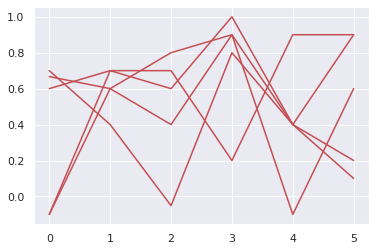

In [171]:
import matplotlib.pyplot as plt

for k,v in over_time.items():
    if 'blank' in k:
        continue
    c = 'r' if 'darts' in k else 'b'
    plt.plot(v,label=k, color=c)
plt.show()

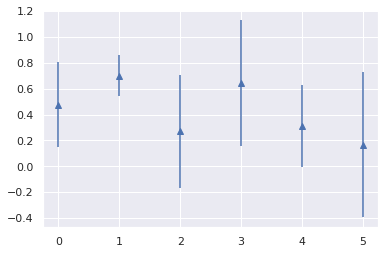

In [201]:
import matplotlib.pyplot as plt
import statistics as stat
avg = []
std=[]
for e in range(6):
    a = []
    for k,v in over_time.items():
        a.append(v[e])
    avg.append(sum(a)/len(a))
    std.append(stat.stdev(a))
#for k,v in over_time_zc.items():
#plt.plot(avg,label=k)
x = range(len(avg))
plt.errorbar(x, avg, std, linestyle='None', marker='^')
plt.show()

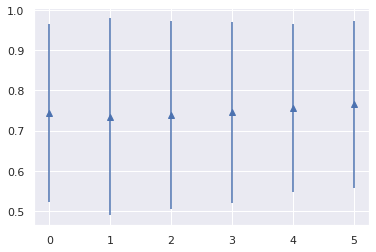

In [200]:
import matplotlib.pyplot as plt
import statistics as stat
avg = []
std=[]
for e in range(6):
    a = []
    for k,v in over_time_zc.items():
        a.append(v[e])
    avg.append(sum(a)/len(a))
    std.append(stat.stdev(a))
#for k,v in over_time_zc.items():
#plt.plot(avg,label=k)
x = range(len(avg))
plt.errorbar(x, avg, std, linestyle='None', marker='^')
plt.show()

In [126]:
idx = 0;
for k,v in all_results.items():
    kk = 'blank'+str(idx) if 'blank' in k else 'darts'+str(idx)
    sq_op_strengths[kk] = []
    strengths = v[1]
    bva=v[2]
    for e in range(6):
        #print(strengths)
        sq_op_strengths[kk].append([(bva-pacc) for pacc in strengths[e]])
    idx += 1
    

In [157]:
all_corr = []
for e in range(6):
    d = {}
    for k,v in sq_op_strengths.items():
        d[k] = v[e]
    df = DataFrame(d)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,avg-acc,disc-acc,best-acc
avg-acc,1.000000,-0.416667,0.65
best-acc,0.650000,-0.300000,1.00
disc-acc,-0.416667,1.000000,-0.30


               avg-acc  disc-acc  best-acc  disc-acc-new
avg-acc       1.000000 -0.416667  0.650000     -0.483333
best-acc      0.650000 -0.300000  1.000000     -0.316667
disc-acc     -0.416667  1.000000 -0.300000      0.750000
disc-acc-new -0.483333  0.750000 -0.316667      1.000000
(4, 4)
(4, 4)


[Text(0.5, 0, 'avg-acc'),
 Text(1.5, 0, 'disc-acc'),
 Text(2.5, 0, 'best-acc'),
 Text(3.5, 0, 'disc-acc-new')]

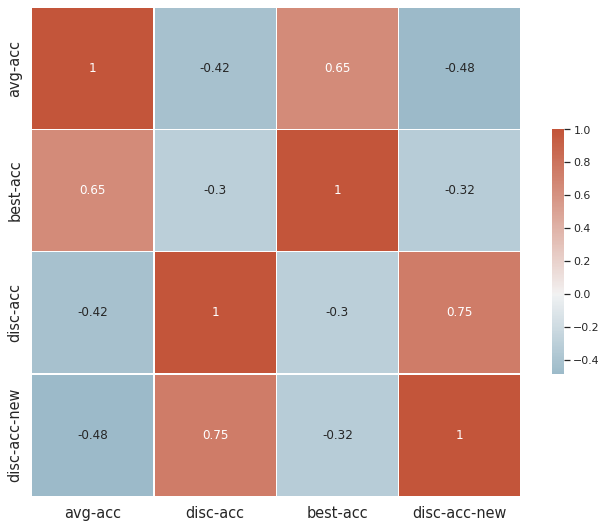

In [169]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")

#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
#df=df.reindex(["best-acc", "avg-acc", "disc-acc", "darts-pt", "disc-zc", "zc-pt", "darts"])
#df = df[]
#print(df)

# Compute the correlation matrix
corr=df_mean
#corr = df.corr(method='spearman')
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#for i in range(3,7):
#    for j in range(0,7):
#        mask[j][i]=True

masked_corr = corr#.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask#[1:7,0:3]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.0)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=None, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5)


In [148]:
disc_accuracy_stage_0 = {(100, 0, 0): 83.267998,
 (100, 0, 1): 82.239998,
 (100, 0, 2): 64.995995,
 (100, 0, 3): 71.755997,
 (100, 0, 4): 54.307999,
 (100, 1, 0): 84.935997,
 (100, 1, 1): 83.231995,
 (100, 1, 2): 73.231995,
 (100, 1, 3): 76.771996,
 (100, 1, 4): 83.451996,
 (100, 2, 0): 83.867996,
 (100, 2, 1): 83.727997,
 (100, 2, 2): 77.332001,
 (100, 2, 3): 76.832001,
 (100, 2, 4): 83.251999,
 (100, 3, 0): 65.767998,
 (100, 3, 1): 84.444,
 (100, 3, 2): 75.816002,
 (100, 3, 3): 78.68,
 (100, 3, 4): 62.703999,
 (100, 4, 0): 83.571999,
 (100, 4, 1): 82.028,
 (100, 4, 2): 75.023994,
 (100, 4, 3): 76.087997,
 (100, 4, 4): 82.563995,
 (100, 5, 0): 83.947998,
 (100, 5, 1): 82.447998,
 (100, 5, 2): 66.692001,
 (100, 5, 3): 71.363998,
 (100, 5, 4): 80.311996}
sq_op_strengths['disc-acc-new'] = []
for e in range(6):
    v = []
    for o in range(5):
        v.append(disc_accuracy_stage_0[(100,e,o)])
    sq_op_strengths['disc-acc-new'].append(v)

In [161]:

sq_op_strengths

{'avg-acc': [[77.36, 83.81, 86.38, 87.32, 81.02],
  [80.03, 83.11, 85.23, 85.99, 81.52],
  [82.9, 82.44, 84.05, 84.49, 81.98],
  [74.02, 85.17, 87.3, 88.28, 81.38],
  [80.14, 83.05, 85.09, 85.7, 81.89],
  [77.61, 83.43, 86.18, 86.95, 81.74]],
 'disc-acc': [[83.42, 84.1, 72.0, 76.35, 39.66],
  [85.12, 83.39, 76.72, 81.34, 84.38],
  [85.96, 85.18, 54.02, 78.41, 84.88],
  [66.18, 85.38, 78.8, 81.59, 82.89],
  [86.44, 84.75, 80.23, 80.46, 80.13],
  [86.28, 82.69, 77.13, 76.8, 81.99]],
 'best-acc': [[94.15, 94.18, 94.44, 94.68, 93.86],
  [94.24, 94.16, 94.49, 94.68, 94.09],
  [94.25, 94.43, 94.49, 94.68, 94.19],
  [94.16, 94.68, 94.03, 94.04, 93.85],
  [94.29, 94.18, 94.56, 94.68, 94.23],
  [94.05, 94.16, 94.68, 94.56, 94.1]],
 'disc-acc-new': [[83.267998, 82.239998, 64.995995, 71.755997, 54.307999],
  [84.935997, 83.231995, 73.231995, 76.771996, 83.451996],
  [83.867996, 83.727997, 77.332001, 76.832001, 83.251999],
  [65.767998, 84.444, 75.816002, 78.68, 62.703999],
  [83.571999, 82.028, 7

In [159]:
all_corr = []
for e in range(6):
    d = {}
    for k,v in sq_op_strengths.items():
        d[k] = v[e]
    df = DataFrame(d)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,avg-acc,disc-acc,best-acc
avg-acc,1.000000,-0.416667,0.65
best-acc,0.650000,-0.300000,1.00
disc-acc,-0.416667,1.000000,-0.30


In [162]:
all_corr = []
for e in range(6):
    d = {}
    for k,v in sq_op_strengths.items():
        d[k] = v[e]
    df = DataFrame(d)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,avg-acc,disc-acc,best-acc,disc-acc-new
avg-acc,1.000000,-0.416667,0.650000,-0.483333
best-acc,0.650000,-0.300000,1.000000,-0.316667
disc-acc,-0.416667,1.000000,-0.300000,0.750000
disc-acc-new,-0.483333,0.750000,-0.316667,1.000000


In [164]:
all_corr = []
for e in range(6):
    d = {}
    for k,v in sq_op_strengths.items():
        d[k] = v[e]
    df = DataFrame(d)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

,avg-acc,disc-acc,best-acc,disc-acc-new
avg-acc,1.000000,-0.416667,0.650000,-0.483333
best-acc,0.650000,-0.300000,1.000000,-0.316667
disc-acc,-0.416667,1.000000,-0.300000,0.750000
disc-acc-new,-0.483333,0.750000,-0.316667,1.000000
